# Missing Data  - - 

In [1]:
#
import pandas as pd
import numpy as np


In [2]:
#

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# data['Cabin'].isnull().mean()
data['cabin_null'] = np.where(data['Cabin'].isnull(),1,0)
data['cabin_null'].mean()

0.7710437710437711

In [9]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Mena-Median technique

In [18]:
#  Handle missing data using Mena-Median technique - - - 

new = pd.read_csv("D:\\MBA\\D A T A     S C I E N C E\\Data\\titanic_train.csv", usecols = ['Survived', 'Age', 'Fare'])
# new.head()
# new.isnull().sum()
med = new['Age'].median()
new['Age_median'] = new['Age'].fillna(med)
# new['Age_median'].isnull().sum()

print(new['Age'].std())
print(new['Age_median'].std())

14.526497332334044
13.019696550973194


## Random Sample Imputation

In [22]:
##   - - -

import pandas as pd
import numpy as np

data = pd.read_csv('D:\\MBA\\D A T A     S C I E N C E\\Data\\titanic_train.csv', usecols = ['Age', 'Survived', 'Fare'])
data.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
data['Age'].isnull().sum()


177

In [24]:
# - -
data['Age'].dropna().sample(data['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [25]:
median = data.Age.median()

In [26]:
#
def fill_nan(data, variable, median):
    
    data[variable + '_median'] = data[variable].fillna(median)
    # create new feature  -
    data[variable + '_random'] = data[variable]
    # select random values for replacing nan values  --
    random_values = data[variable].dropna().sample(data[variable].isnull().sum(), random_state = 0)
    # find the index that we have to be replace with random values  --
    random_values.index = data[data[variable].isnull()].index
    # replace data nan data with random values using index   --- - - 
    data.loc[data[variable].isnull(), variable + '_random'] = random_values
    
fill_nan(data, 'Age', median)

In [27]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


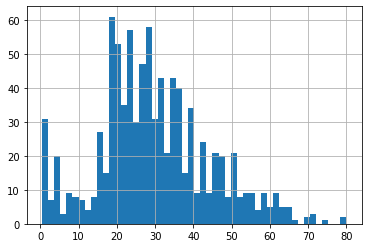

In [28]:
data.Age_random.hist(bins=50)

## Capturing NaN values with a new feature

In [1]:
#    - -  -

import pandas as pd
import numpy as np

data = pd.read_csv('D:\\MBA\\D A T A     S C I E N C E\\Data\\titanic_train.csv', usecols = ['Age', 'Survived', 'Fare'])
# data.head()

data['Age_NAN'] = np.where(data['Age'].isnull(),1,0)
data.head()


,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [2]:
data.Age.median()

28.0

In [3]:
data['Age'].fillna(data.Age.median(), inplace = True)

In [4]:
data.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## End  of  Distribution  Imputation

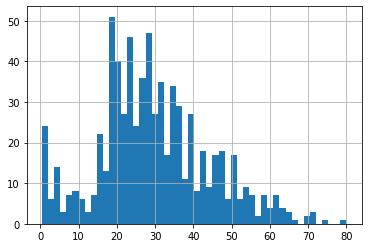

In [14]:

#   - -


import pandas as pd
import numpy as np

data = pd.read_csv('D:\\MBA\\D A T A     S C I E N C E\\Data\\titanic_train.csv', usecols = ['Age', 'Survived', 'Fare'])
# data.head()

# now  we take 3rd std normal distribution to fill our NaN
data.Age.hist(bins=50)

In [15]:
# - -
extreme = data.Age.mean() + 3 * data.Age.std()


In [16]:
data.Age.median()

28.0

In [17]:
# 
def impute_dist(data, variable, median, extreme):
    
    data[variable + '_end_dist'] = data[variable].fillna(extreme)
    data[variable].fillna(median, inplace = True)
    
impute_dist(data, 'Age', data.Age.median(), extreme)



In [18]:
data.head(10)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


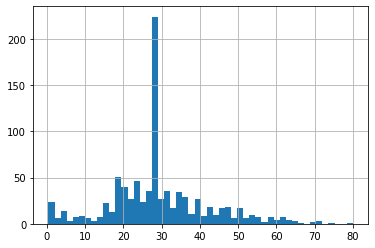

In [19]:
data.Age.hist(bins=50)

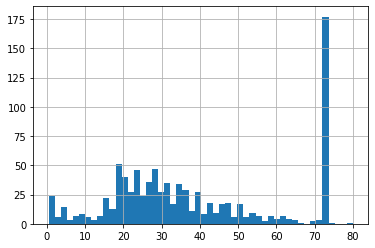

In [20]:
data.Age_end_dist.hist(bins=50)

##  Arbitarary  Imputation

In [1]:

#   - - - 


import pandas as pd
import numpy as np

data = pd.read_csv('D:\\MBA\\D A T A     S C I E N C E\\Data\\titanic_train.csv', usecols = ['Age', 'Survived', 'Fare'])
data.head()



,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
#
def arbitary(data, variable):
    data[variable + '_ten'] = data[variable].fillna(10)
    data[variable + '_80'] = data[variable].fillna(80)
arbitary(data, 'Age')

In [3]:
data.head()

,Survived,Age,Fare,Age_ten,Age_80
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


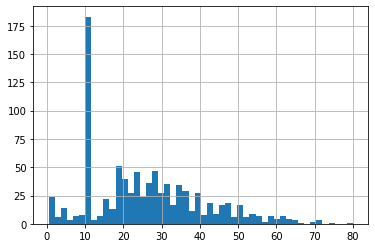

In [4]:
data.Age_ten.hist(bins = 50)

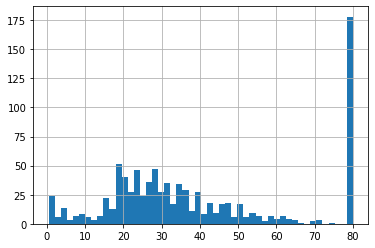

In [5]:
data.Age_80.hist(bins = 50)

In [6]:
# new  - - -

# Missing Categorical Data - - 

In [11]:

import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\hemant\\Downloads\\train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

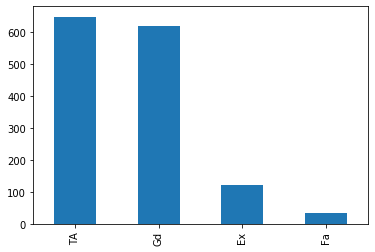

In [14]:
#  us we see bsmtqual and garagetype have not much null values so we replace it with the most frequent catrgory  -- 

# data.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

data['BsmtQual'].value_counts().plot.bar()

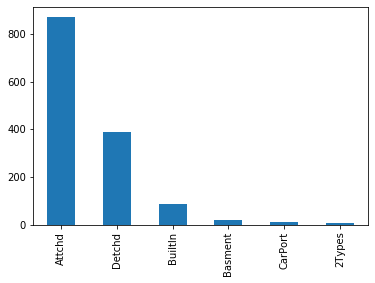

In [15]:

# data['GarageType'].value_counts().plot.bar()

data['Gara']

In [21]:
# - -
def impute_nan(data, variable):
    
    most_freq = data[variable].mode()[0]
    data[variable].fillna(most_freq, inplace = True)
    

In [22]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data, i)

In [23]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [1]:
#  
# #  Adding a new variable with capture NaN -  - -


In [2]:

import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\hemant\\Downloads\\train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [3]:

data['FireplaceQu_new'] = np.where(data['FireplaceQu'].isnull(),1,0)
data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0], inplace = True)


In [4]:
data['FireplaceQu'].isnull().sum()

0

In [5]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_new
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [6]:

# Suppose if uh have more frequent category, we just replace NaN with a new category - - - 


In [7]:

import pandas as pd
import numpy as np

data = pd.read_csv('C:\\Users\\hemant\\Downloads\\train.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [10]:

def new_data(data, variable):
    
    data[variable] = np.where(data[variable].isnull(), 'Missing', data[variable])
    

In [11]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    new_data(data, feature)
    

In [12]:
data.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [13]:
#  - - 

## > Using ML algorithms   --
### it is another way to handle missing values for both the types 